<a href="https://colab.research.google.com/github/flaakira/Alura/blob/master/Formac%CC%A7a%CC%83o_Data_Science_Alura_Ana%CC%81lise_explorato%CC%81ria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [10]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [11]:
filmes = pd.read_csv('movies.csv', index_col="movieId")
filmes.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [12]:
filmes.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [13]:
filmes.columns

Index(['title', 'genres'], dtype='object')

In [0]:
renomear = {'title' : 'titulo', 
            'genres': 'generos'}

In [0]:
filmes = filmes.rename(columns = renomear)

In [0]:
filmes.index.name = 'filmeId'

In [17]:
filmes.columns

Index(['titulo', 'generos'], dtype='object')

In [18]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [19]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [20]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head(3)

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
notas = pd.read_csv('ratings.csv', index_col=['movieId'])

In [22]:
notas.columns

Index(['userId', 'rating', 'timestamp'], dtype='object')

In [0]:
renomear = {'userId' : 'usuarioId', 
            'rating' : 'nota', 
            'timestamp': 'momento'}

In [0]:
notas = notas.rename(columns = renomear)

In [0]:
notas.index.name = 'filmeId'

In [26]:
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [27]:
notas.groupby(['filmeId']).nota.mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
6         3.946078
7         3.185185
8         2.875000
9         3.125000
10        3.496212
11        3.671429
12        2.421053
13        3.125000
14        3.833333
15        3.000000
16        3.926829
17        3.776119
18        3.700000
19        2.727273
20        2.500000
21        3.494382
22        3.222222
23        3.125000
24        3.125000
25        3.625000
26        3.500000
27        3.333333
28        4.227273
29        4.013158
30        3.000000
            ...   
188189    4.500000
188301    3.666667
188675    3.500000
188751    4.500000
188797    4.000000
188833    4.500000
189043    2.500000
189111    3.000000
189333    3.750000
189381    2.500000
189547    1.000000
189713    2.500000
190183    3.500000
190207    1.500000
190209    4.000000
190213    1.000000
190215    1.500000
190219    1.000000
190221    1.000000
191005    4.500000
193565    3.500000
1935

In [0]:
filmes['nota_media'] = notas.groupby(['filmeId']).nota.mean()

In [29]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [30]:
# solução para calcular o total de votos por filme

notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931


In [0]:
filmes['total_de_votos'] = notas.groupby(['filmeId']).usuarioId.count()

In [32]:
notas.groupby(['filmeId']).usuarioId.count()

filmeId
1         215
2         110
3          52
4           7
5          49
6         102
7          54
8           8
9          16
10        132
11         70
12         19
13          8
14         18
15         13
16         82
17         67
18         20
19         88
20         15
21         89
22         36
23         16
24         28
25         76
26         13
27          9
28         11
29         38
30          3
         ... 
188189      1
188301      3
188675      1
188751      1
188797      1
188833      1
189043      1
189111      1
189333      2
189381      1
189547      1
189713      1
190183      1
190207      1
190209      1
190213      1
190215      1
190219      1
190221      1
191005      1
193565      1
193567      1
193571      1
193573      1
193579      1
193581      1
193583      1
193585      1
193587      1
193609      1
Name: usuarioId, Length: 9724, dtype: int64

In [33]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [0]:
# solução para criar a nova coluna e filtrar os filmes
votos_50 =filmes.query("total_de_votos >= 50")

In [35]:
votos_50.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Histograma - visualizando notas medias')

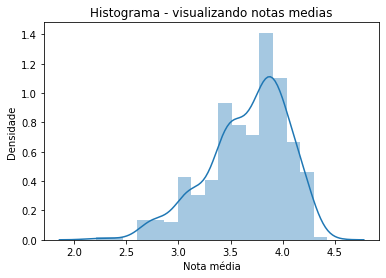

In [36]:
ax = sns.distplot(votos_50.nota_media)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Histograma - visualizando notas medias")

Text(0.5, 1.0, 'Média de votos em filmes com 50 ou mais votos')

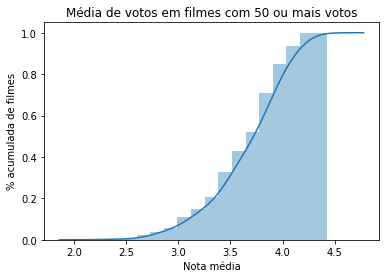

In [37]:
# solução cumulativa
ax = sns.distplot(votos_50.nota_media,kde=True,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes com 50 ou mais votos")

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

In [0]:
filmes = filmes.dropna(0)

In [39]:
print(filmes[filmes['total_de_votos'].isnull()])

Empty DataFrame
Columns: [titulo, generos, ano_de_lancamento, nota_media, total_de_votos]
Index: []


Text(0.5, 1.0, 'Média de votos em filmes dentre os filmes')

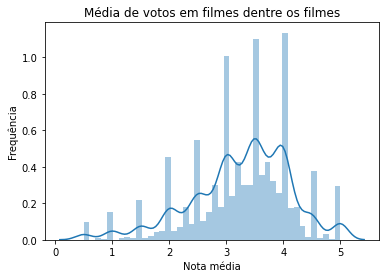

In [40]:
# solução histograma
ax = sns.distplot(filmes.nota_media)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes dentre os filmes")

Text(0.5, 1.0, 'Média de votos em filmes')

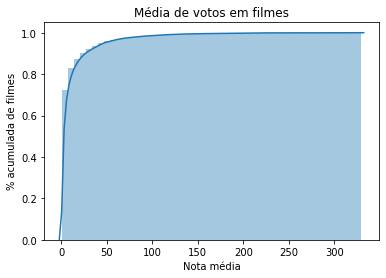

In [41]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos,kde=True,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes")

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile([.8,])

In [43]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 4.00


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [44]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 20 generos distintos


In [45]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),1995.0,2.357143,7.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),1995.0,3.071429,49.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [46]:
# solução
soma_generos = generos.sum().sort_values(ascending=False)
soma_generos

Drama                 4347
Comedy                3753
Thriller              1887
Action                1827
Romance               1591
Adventure             1262
Crime                 1196
SciFi                  978
Horror                 977
Fantasy                778
Children               664
Animation              610
Mystery                573
Documentary            438
War                    381
Musical                333
Western                167
IMAX                   158
FilmNoir                85
(no genres listed)      25
dtype: int64

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = soma_generos.head()

In [48]:
print(top5_generos_em_quantidade_de_filmes)

Drama       4347
Comedy      3753
Thriller    1887
Action      1827
Romance     1591
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [49]:
votos_por_genero = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# solução
votos_por_genero.sum().sort_values(ascending=False)


Drama                 41926.0
Comedy                39053.0
Action                30631.0
Thriller              26447.0
Adventure             24161.0
Romance               18124.0
SciFi                 17237.0
Crime                 16681.0
Fantasy               11834.0
Children               9208.0
Mystery                7674.0
Horror                 7291.0
Animation              6988.0
War                    4859.0
IMAX                   4145.0
Musical                4138.0
Western                1930.0
Documentary            1219.0
FilmNoir                870.0
(no genres listed)       37.0
dtype: float64

In [51]:
votos_por_genero_soma = votos_por_genero.sum().sort_values(ascending=False)
votos_por_genero_soma.head()

Drama        41926.0
Comedy       39053.0
Action       30631.0
Thriller     26447.0
Adventure    24161.0
dtype: float64

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [52]:
# solucao código
votos = votos_por_genero_soma/soma_generos.sum()
votos

Drama                 1.903132
Comedy                1.772719
Action                1.390422
Thriller              1.200499
Adventure             1.096732
Romance               0.822696
SciFi                 0.782433
Crime                 0.757195
Fantasy               0.537177
Children              0.417975
Mystery               0.348343
Horror                0.330958
Animation             0.317204
War                   0.220563
IMAX                  0.188153
Musical               0.187835
Western               0.087608
Documentary           0.055334
FilmNoir              0.039492
(no genres listed)    0.001680
dtype: float64

Text(0.5, 1.0, 'Votos por filme por genero')

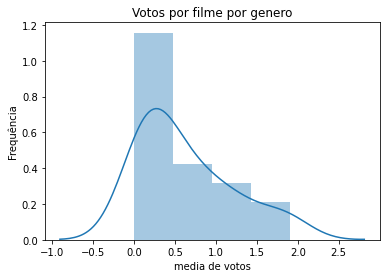

In [53]:
# solução com visualização 
ax = sns.distplot(votos)
ax.set(xlabel="media de votos", ylabel="Frequência")
ax.set_title("Votos por filme por genero")

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

filmes lancados
action 4 colocado com 1828 em quantidade de filmes no genero
war 15 colocado com 382 filmes

votos por categoria
action 3 colocado com 30635 avaliacoes
war 14 colocado com 4859 avaliacoes

media quantidade de votos/quantidade de filme por genero

Action 1.387
war 0.22

Ja era esperado o genero de acao ter um maior volume por ter um leque maior de possibilidade no genero. Porem mesmo assim demonstra que a media de avaliacao torna os filmes de Acao (action) mais populares
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [0]:
import matplotlib.pyplot as plt

In [55]:
filmes.head(2)

,titulo,ano_de_lancamento,nota_media,total_de_votos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
# solução:
horror = filmes.query("Horror == 1")


In [0]:
adventure = filmes.query("Adventure == 1")


Text(0.5, 1.0, 'Distribuicao do total de votos - Adventure x Horror')

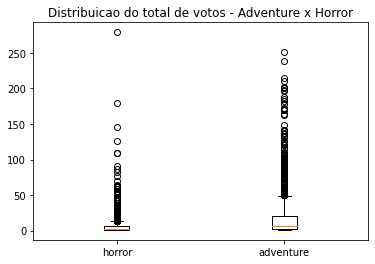

In [58]:
plt.boxplot([horror.total_de_votos, adventure.total_de_votos], labels=['horror', 'adventure'])
plt.title("Distribuicao do total de votos - Adventure x Horror")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 1.0, 'Distribuição dos votos no genero de Adventure')

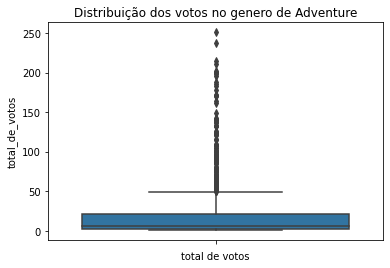

In [59]:
ax = sns.boxplot(adventure.total_de_votos,orient='v')
ax.set(xlabel="total de votos")
ax.set_title("Distribuição dos votos no genero de Adventure")

Text(0.5, 1.0, 'Distribuição dos votos no genero de Horror')

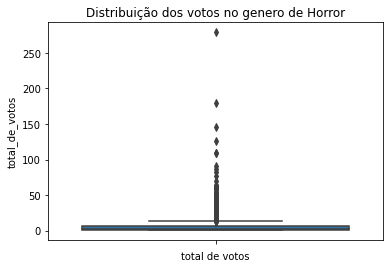

In [60]:
ax = sns.boxplot(horror.total_de_votos, orient='v')
ax.set(xlabel="total de votos")
ax.set_title("Distribuição dos votos no genero de Horror")

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
Considerando  "popularidade" média de um filme em cada categoria. Podemos considerar os filmes no genero Adventure serem mais populares, desta forma apresentam um potencial maior de faturamento.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição dos votos para o genero Adventure')

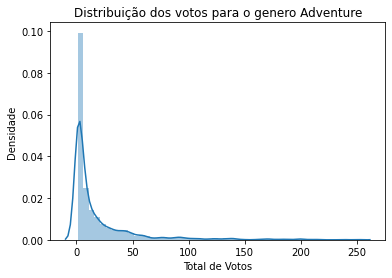

In [61]:
# solucao histograma de aventura
ax = sns.distplot(adventure.total_de_votos)
ax.set(xlabel="Total de Votos", ylabel="Densidade")
ax.set_title("Distribuição dos votos para o genero Adventure")

Text(0.5, 1.0, 'Distribuição dos votos para o genero Horror')

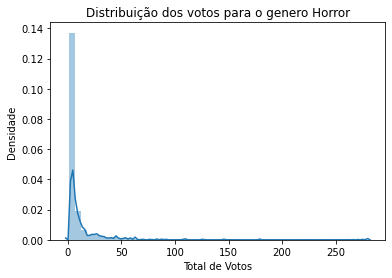

In [62]:
# solucao histograma de horror
ax = sns.distplot(horror.total_de_votos)
ax.set(xlabel="Total de Votos", ylabel="Densidade")
ax.set_title("Distribuição dos votos para o genero Horror")

In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import ranksums

In [64]:
_, p = ranksums(horror.total_de_votos, adventure.total_de_votos)
p

2.1720785579032454e-31

In [0]:
from statsmodels.stats.weightstats import DescrStatsW


In [66]:
# solução com o teste desejado
descr_horror = DescrStatsW(horror.total_de_votos)
descr_adventure = DescrStatsW(adventure.total_de_votos)
comparacao = descr_horror.get_compare(descr_adventure)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-11.6824,1.170,-9.983,0.000,-13.977,-9.387


### Solução (explique sua conclusão):
Devido possuirmos um P igual a 0 com isso temos uma variacao estatistica valida, e um intervalo de confianca que varia entre -13.977	a -9.387.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuição das notas genero Adventure')

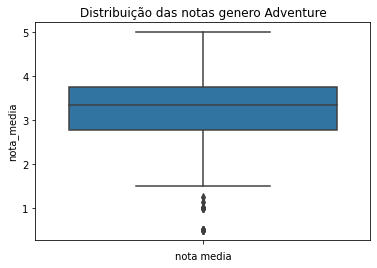

In [67]:
# solução:
ax = sns.boxplot(adventure.nota_media,orient='v')
ax.set(xlabel="nota media")
ax.set_title("Distribuição das notas genero Adventure")

Text(0.5, 1.0, 'Distribuição das notas genero horror')

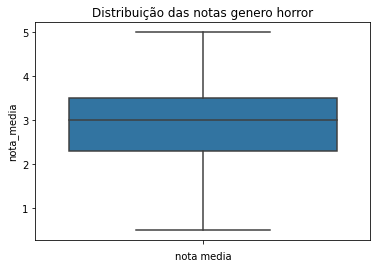

In [68]:
ax = sns.boxplot(horror.nota_media,orient='v')
ax.set(xlabel="nota media")
ax.set_title("Distribuição das notas genero horror")

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Visualmente, as notas para o genero de Adventure apresentam uma media superior.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição das notas no genero de Adventure')

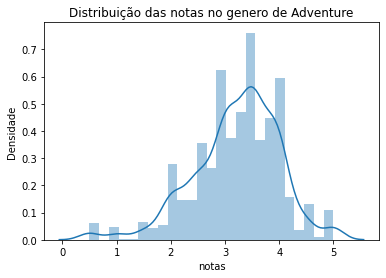

In [69]:
# solucao histograma de aventura
ax = sns.distplot(adventure.nota_media)
ax.set(xlabel="notas", ylabel="Densidade")
ax.set_title("Distribuição das notas no genero de Adventure")

Text(0.5, 1.0, 'Distribuição das notas no genero de Horror')

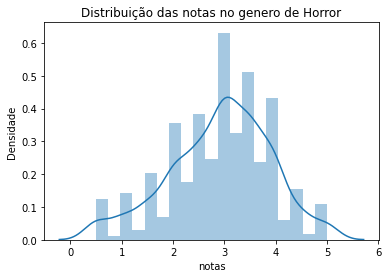

In [70]:
# solucao histograma de horror
ax = sns.distplot(horror.nota_media)
ax.set(xlabel="notas", ylabel="Densidade")
ax.set_title("Distribuição das notas no genero de Horror")

In [71]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

descr_horror = DescrStatsW(horror.nota_media)
descr_adventure = DescrStatsW(adventure.nota_media)
comparacao = descr_horror.get_compare(descr_adventure)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2963,0.038,-7.855,0.000,-0.370,-0.222


In [72]:
# solução com o teste desejado
adventure.nota_media.describe()

count    1262.000000
mean        3.215230
std         0.792274
min         0.500000
25%         2.764583
50%         3.333333
75%         3.750000
max         5.000000
Name: nota_media, dtype: float64

In [73]:
horror.nota_media.describe()

count    977.000000
mean       2.918965
std        0.992273
min        0.500000
25%        2.294872
50%        3.000000
75%        3.500000
max        5.000000
Name: nota_media, dtype: float64

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Devido possuirmos um P igual a 0 com isso temos uma variacao estatistica valida, e um intervalo de confianca que varia entre -0.370	a -0.222.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [74]:
# solução: encontrando os top 5 filmes desses generos
votos_por_genero_soma.head(2)

Drama     41926.0
Comedy    39053.0
dtype: float64

In [0]:
drama = filmes.query("Drama ==1")
drama = drama.sort_values('total_de_votos', ascending=0)
drama = drama.head(5)

In [0]:
Comedy = filmes.query("Comedy ==1")
Comedy = Comedy.sort_values('total_de_votos', ascending=0)
Comedy = Comedy.head(5)

In [0]:
frame = [drama, Comedy]
result = pd.concat(frame)

In [78]:
result = result.sort_values('nota_media', ascending=0)
result.head(5)

,titulo,ano_de_lancamento,nota_media,total_de_votos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
527,Schindler's List (1993),1993.0,4.225000,220.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
296,Pulp Fiction (1994),1994.0,4.197068,307.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
296,Pulp Fiction (1994),1994.0,4.197068,307.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
356,Forrest Gump (1994),1994.0,4.164134,329.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [79]:
# solucao
nota_por_genero = pd.DataFrame((generos.values.T * filmes['nota_media'].values).T, columns = generos.columns)
nota_por_genero.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,0.0,3.920930,3.92093,3.920930,3.920930,0.0,0.0,0.000000,3.920930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,3.431818,0.00000,3.431818,0.000000,0.0,0.0,0.000000,3.431818,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.00000,0.000000,3.259615,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.259615,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.00000,0.000000,2.357143,0.0,0.0,2.357143,0.000000,0.0,0.0,0.0,0.0,0.0,2.357143,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.00000,0.000000,3.071429,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [80]:
nota_por_genero = nota_por_genero.sum().sort_values(ascending=False)
nota_por_genero

Drama                 14869.517355
Comedy                11940.981243
Thriller               5955.403312
Action                 5653.243165
Romance                5353.508689
Adventure              4057.620018
Crime                  3949.005222
SciFi                  3034.834705
Horror                 2851.828512
Fantasy                2504.259952
Animation              2133.242682
Children               2063.506399
Mystery                1908.298347
Documentary            1656.376580
War                    1360.800532
Musical                1097.691530
Western                 565.025948
IMAX                    523.295427
FilmNoir                311.990030
(no genres listed)       80.119048
dtype: float64

In [0]:
result = pd.concat([nota_por_genero, votos_por_genero_soma], axis=1, join='inner')

In [0]:
renomear ={0:'nota_genero',
          1:'voto_genero'}

In [0]:
result = result.rename(columns = renomear)

In [102]:
result.head(3)

,nota_genero,voto_genero
Drama,14869.517355,41926.0
Comedy,11940.981243,39053.0
Thriller,5955.403312,26447.0


In [151]:
result.corr()

,nota_genero,voto_genero
nota_genero,1.000000,0.934143
voto_genero,0.934143,1.000000


In [0]:
filmes_corr = filmes.drop(columns=['ano_de_lancamento','total_de_votos','(no genres listed)'])

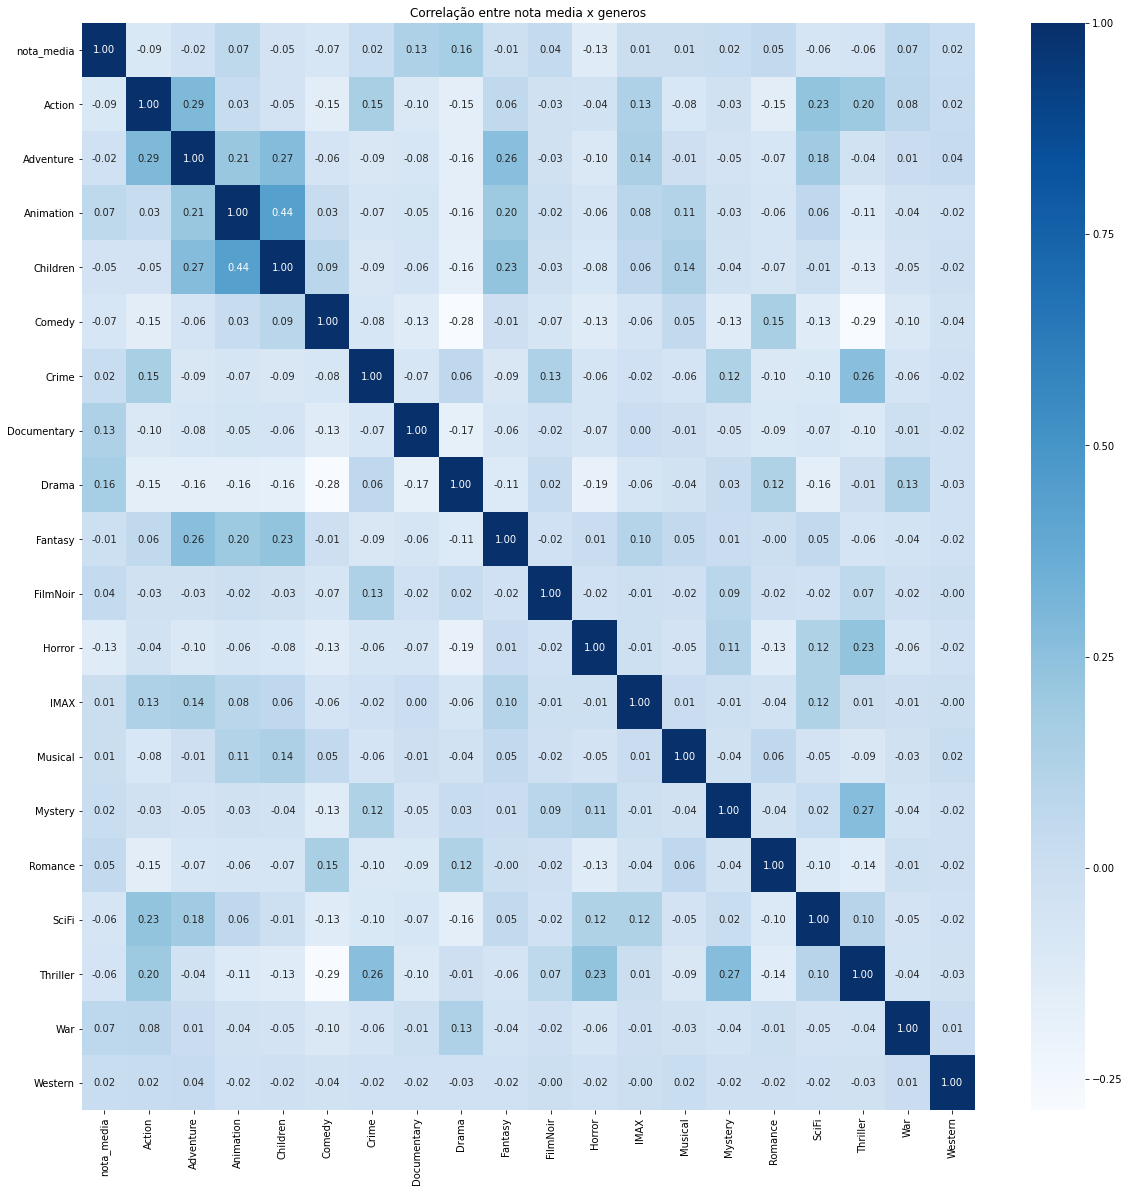

In [133]:
plt.figure(figsize=(20,20))
sns.heatmap(filmes_corr.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre nota media x generos')
plt.show()

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

**Maiores correlacoes:**
Drama 0.16
Documentary 0.13

**Menores Correlacoes:**
Horror -0.13
Action -0.09

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

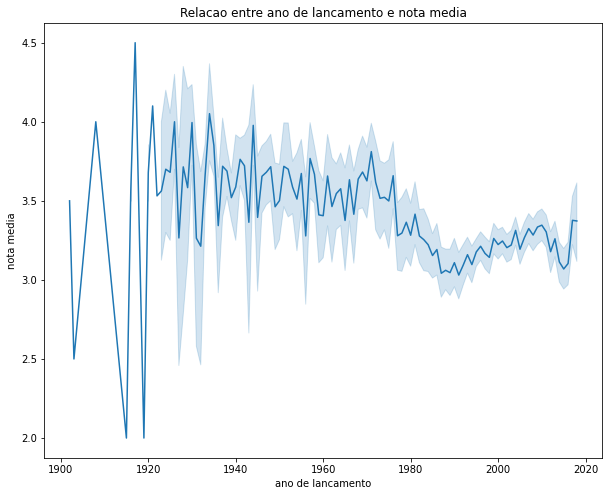

In [144]:
plt.figure(figsize=(10,8))
sns.lineplot(x="ano_de_lancamento", y="nota_media", data=filmes)
plt.title('Relacao entre ano de lancamento e nota media')
plt.xlabel('ano de lancamento')
plt.ylabel('nota media')
plt.show()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [155]:
# solução (código)
filmes[['ano_de_lancamento', 'nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.110907
nota_media,-0.110907,1.000000


### Solução (explicação)
A correlacao entre ano de lancamento e nota media e baixa devido o valor ser entre -0.5 e 0


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [162]:
infos = filmes.drop(columns=['titulo','(no genres listed)', 'Action', 
                             'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller',
       'War', 'Western'])
infos.head(1)

,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,
1,1995.0,3.92093,215.0


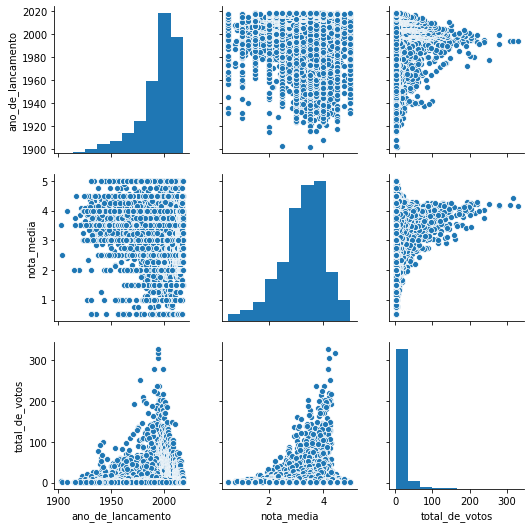

In [163]:
sns.pairplot(infos)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [0]:
# solução